In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
from src import Spotify
from src.utils import KMeans
from urllib.parse import urlencode, urlparse
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# KMeans Description

In [276]:
import matplotlib.cm

datas = np.random.rand(200, 2)
datas[:5]

# kmeans = KMeans(datas=datas)
# kmeans.fit()

# centroids = kmeans.clusters_
# labels = kmeans.labels_

array([[0.79749147, 0.95778923],
       [0.61191899, 0.88591682],
       [0.10884793, 0.94337222],
       [0.3122256 , 0.94117773],
       [0.33822923, 0.27859611]])

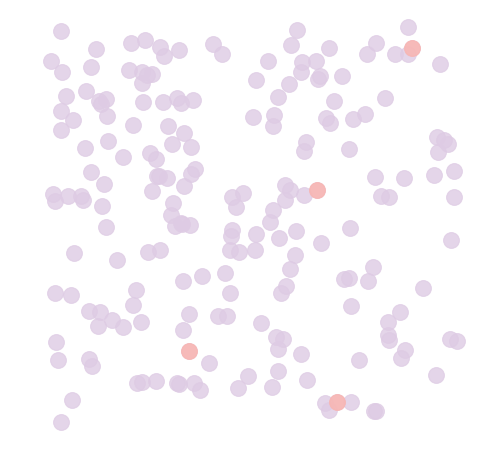

In [299]:
kmeans = KMeans(datas=datas, K=4, ver=1)
kmeans.init_setting()

centroids = kmeans.clusters_

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

uni_labels = np.unique(labels)
cmap = plt.cm.get_cmap("Pastel1", len(uni_labels))
    
plt.scatter(datas[:,0], datas[:,1], color=cmap(1), s=250, alpha=0.8)
plt.scatter(centroids[:,0], centroids[:,1], color=cmap(0), s=250, alpha=0.8)
    
plt.savefig("./visual_images/ecv_step_1.png", transparent=True)

In [312]:
kmeans.next()

ECV 75%


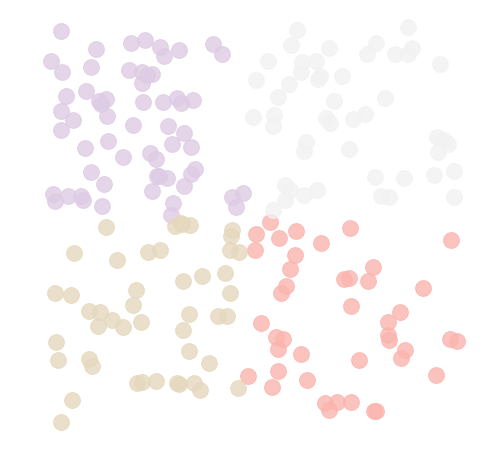

In [313]:
centroids = kmeans.clusters_
labels = kmeans.labels_

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

uni_labels = np.unique(labels)
cmap = plt.cm.get_cmap("Pastel1", len(uni_labels))
    
for label in uni_labels:
    data = datas[labels == label]
    color = cmap(label)
    
    plt.scatter(data[:,0], data[:,1], color=color, s=250, alpha=0.8)
#     plt.scatter(centroids[label][0], centroids[label][0], color=color, s=250, alpha=0.8)
    
    
plt.savefig("./visual_images/finally_ecv_75.png", transparent=True)

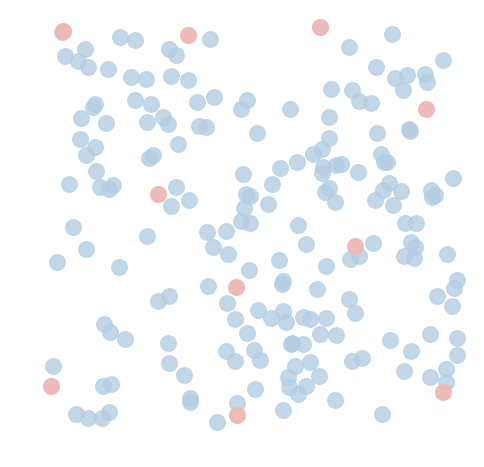

In [65]:
kmeans = KMeans(datas=datas,ver=2)
kmeans.init_setting()

centroids = kmeans.clusters_

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

uni_labels = np.unique(labels)
cmap = plt.cm.get_cmap("Pastel1", len(uni_labels))
    
plt.scatter(datas[:,0], datas[:,1], color=cmap(1), s=250, alpha=0.8)
plt.scatter(centroids[:,0], centroids[:,1], color=cmap(0), s=250, alpha=0.8)
    
plt.savefig("./visual_images/ecv_step_1.png", transparent=True)

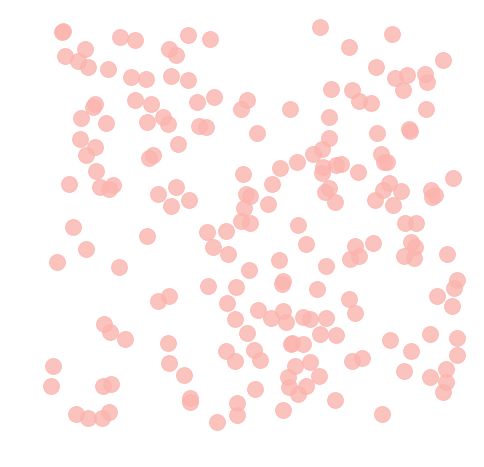

In [19]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

uni_labels = np.unique(labels)
cmap = plt.cm.get_cmap("Pastel1", len(uni_labels))
    
plt.scatter(datas[:,0], datas[:,1], color=cmap(0), s=250, alpha=0.8)
    
    
plt.savefig("./visual_images/kmeans-before-ex.png", transparent=True)

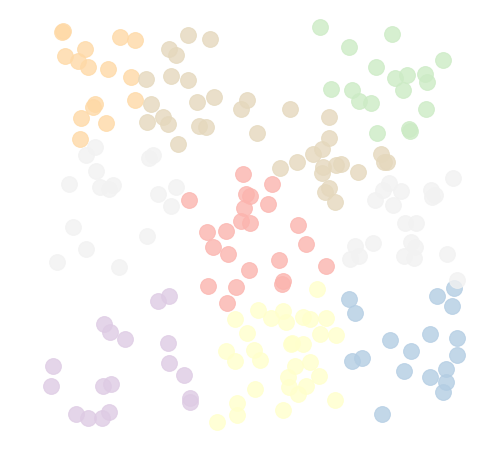

In [21]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

uni_labels = np.unique(labels)
cmap = plt.cm.get_cmap("Pastel1", len(uni_labels))
    
for label in uni_labels:
    data = datas[labels == label]
    color = cmap(label)
    
    plt.scatter(data[:,0], data[:,1], color=color, s=250, alpha=0.8)
    
    
plt.savefig("./visual_images/kmeans-after-ex.png", transparent=True)

In [2]:
sp = Spotify()

sp.search()
sp.get_genres()
sp.get_features()
sp.get_recommend(get_bak=True)

reco_sp = Spotify(sp.reco_tracks)
reco_sp.get_features()

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit


In [26]:
from sklearn.metrics import euclidean_distances as euc

my_features = sp.features.iloc[:, 1:].to_numpy()
reco_features = reco_sp.features.iloc[:,1:].to_numpy()

all_features = np.append(my_features, reco_features, axis=0)

_min = all_features.min(axis=0)
_max = all_features.max(axis=0)
norm_features = (all_features - _min) / (_max - _min)

In [27]:
all_features.shape

(375, 10)

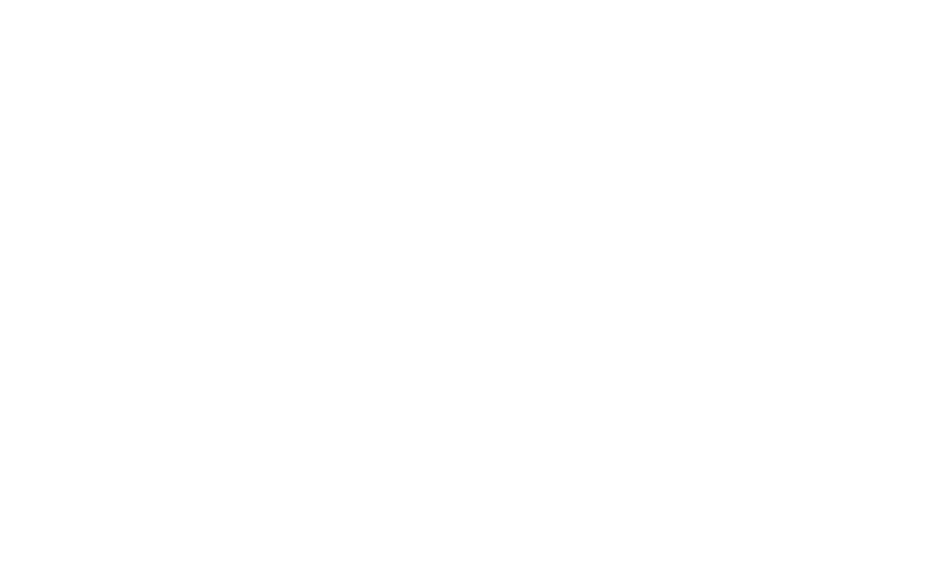

In [38]:
fig=plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],all_features.T, color='white', linewidth=0.1)

plt.savefig("./visual_images/dpp-1.png", transparent=True)

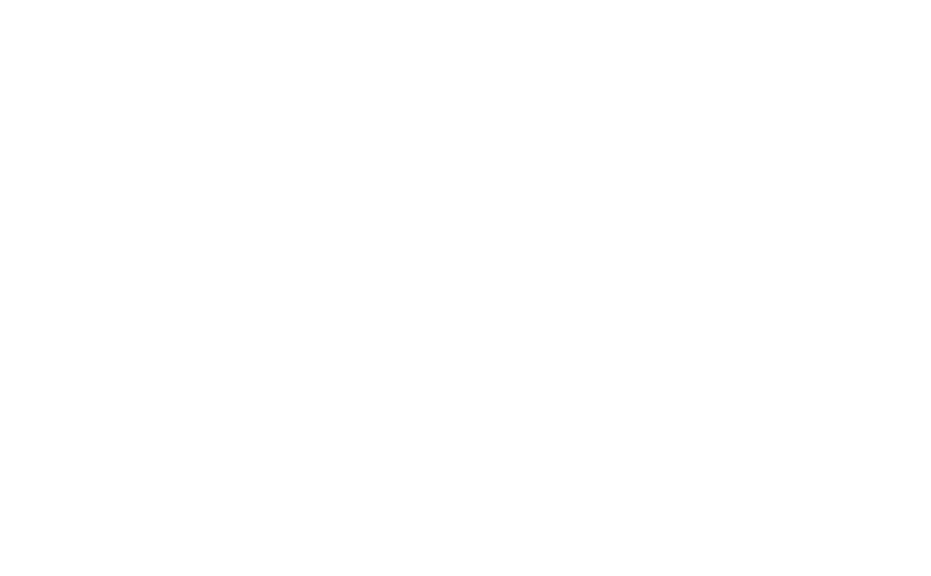

In [39]:
fig=plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],norm_features.T, color='white', linewidth=0.1)

plt.savefig("./visual_images/dpp-2.png", transparent=True)

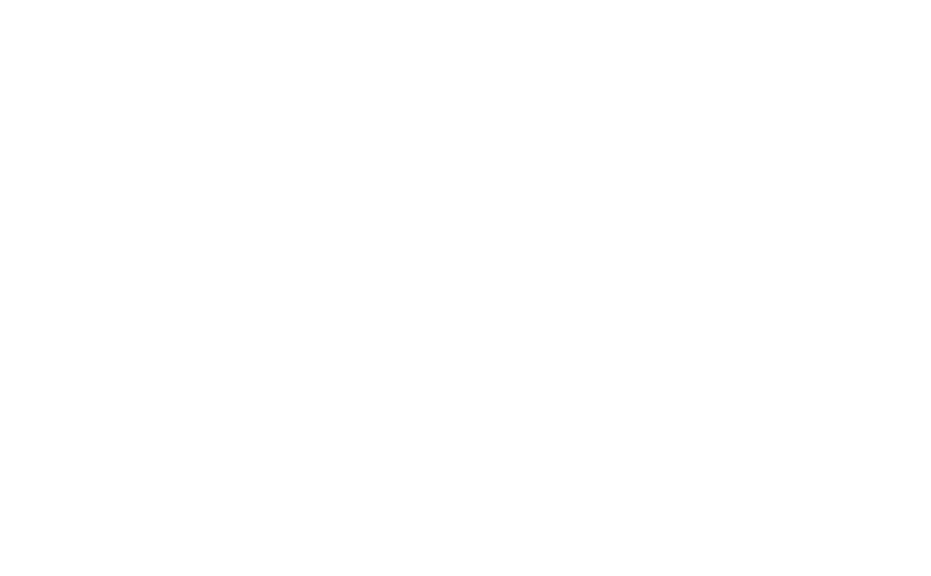

In [225]:
kmeans = KMeans(datas=norm_features)
kmeans.init_setting()

fig=plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],norm_features.T, color='white', linewidth=0.1)
plt.plot(kmeans.clusters_.T, color='white', linewidth=1)

plt.savefig("./visual_images/init_setting.png", transparent=True)

In [226]:
bak_cluster = kmeans.clusters_.copy()

In [235]:
kmeans.clusters_ = bak_cluster.copy()

In [234]:
kmeans.fit()

ECV 62%
ECV 66%
ECV 67%
ECV 68%
ECV 68%
ECV 68%
ECV 68%
ECV 68%
ECV 68%
ECV 68%
ECV 68%


In [53]:
trackIds = np.append(sp.sel_tracks['trackId'], reco_sp.sel_tracks['trackId'])
trackIds.shape

(375,)

In [246]:
kmeans.fit()

ECV 68%
ECV 68%
ECV 68%


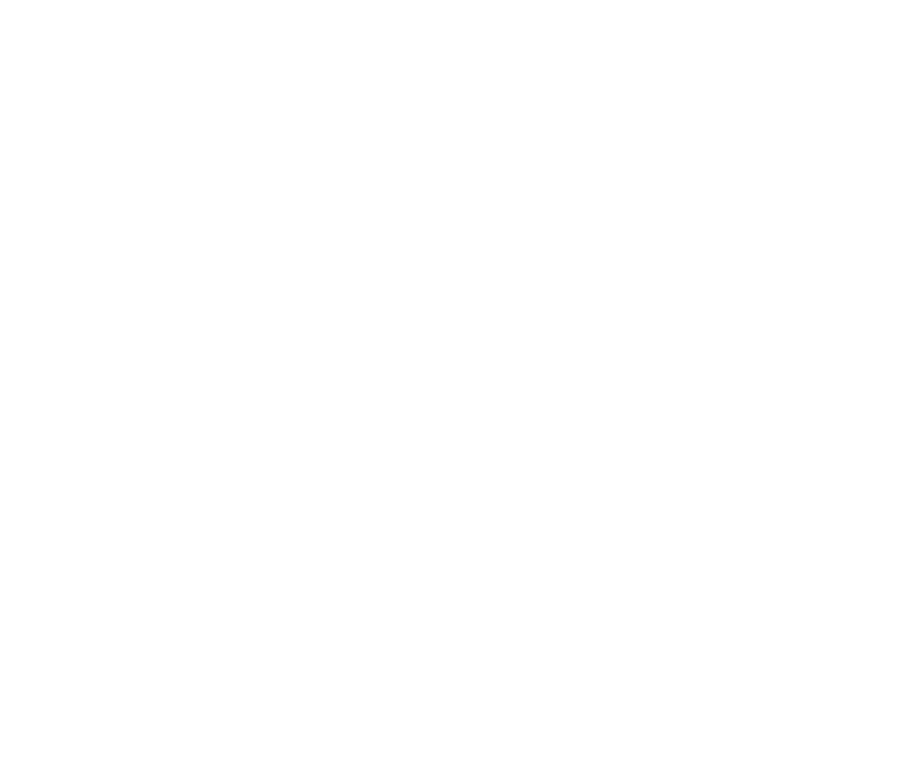

In [247]:
import pandas as pd

plt.figure(figsize=(16,14))

clusters = kmeans.clusters_
labels = kmeans.labels_
datas = kmeans.datas

for label in range(kmeans.K):
    ax = plt.subplot(4,4, label + 1)
    
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')

    data = datas[labels == label]
    cluster = clusters[label]
    
    ax.axes.yaxis.set_visible(False)
    ax.axes.xaxis.set_visible(False)
    
    ax.plot(cluster, color='white', linewidth=2)
    ax.plot(data.T, color='white', linewidth=0.2)
#     ax.text(0.05, 0.95, "클러스터 {}번".format(label),
#             ha='left',
#             va='top',
#             fontsize=12,
#             color='#333',
#            transform=ax.transAxes)

plt.savefig("./visual_images/run_run_68.png", transparent=True)

In [248]:
my_cols = sp.sel_tracks['trackId'].values
columns = np.append(sp.sel_tracks['trackId'], reco_sp.sel_tracks['trackId'])

In [249]:
sp.sel_tracks

,trackId,trackName,artistIds,artistNames,image
0,3w9HSuLDejveVS9G8Qj8i0,Beer (Prod.Way Ched),0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b27388875b...
1,2SMq0lOqCTHayWa9juoI0d,We Are,5a8EJtOEbUJDF4RX3mKK02,Woo,https://i.scdn.co/image/ab67616d0000b27380af1b...
2,5quFr5s5PXYfUX5jV2EBZ1,GANADARA (Feat. IU),4XDi67ZENZcbfKnvMnTYsI,Jay Park,https://i.scdn.co/image/ab67616d0000b2738c0def...
3,6guxIn9kHpncfdkrXn2CIQ,Blue Room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,https://i.scdn.co/image/ab67616d0000b2734ca893...


0 ['3w9HSuLDejveVS9G8Qj8i0' '5quFr5s5PXYfUX5jV2EBZ1']
5 ['2SMq0lOqCTHayWa9juoI0d']
13 ['6guxIn9kHpncfdkrXn2CIQ']


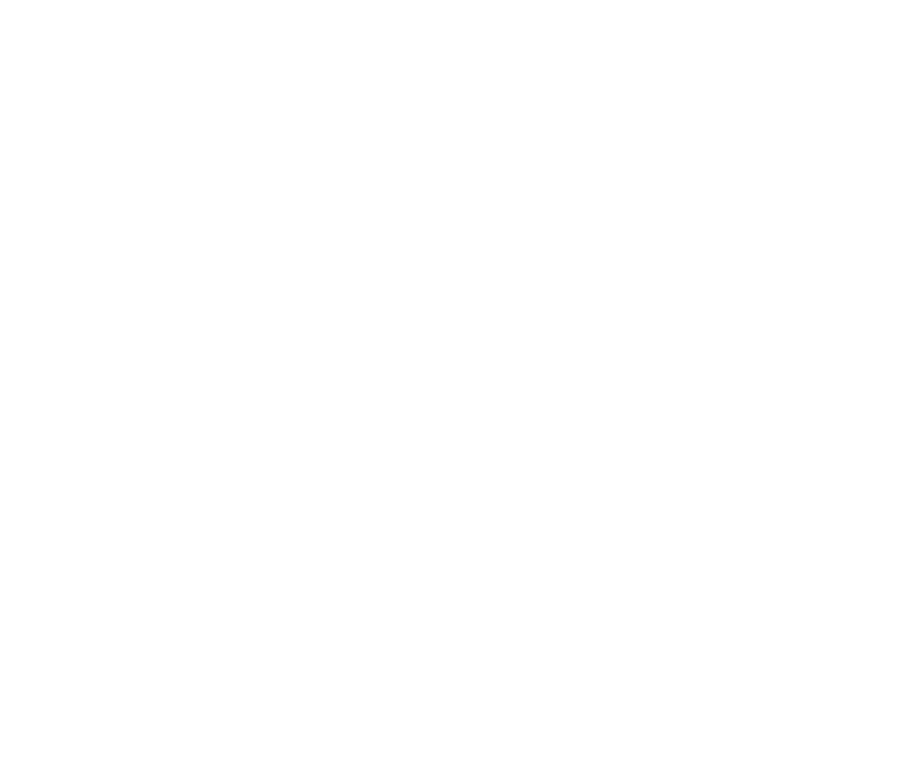

In [250]:
plt.figure(figsize=(16,14))

clusters = kmeans.clusters_
labels = kmeans.labels_
datas = kmeans.datas

for label in range(kmeans.K):
    ax = plt.subplot(4,4, label + 1)
    
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')

    data = datas[labels == label]
    _columns = columns[labels == label]
    cluster = clusters[label]
    alpha=0.25
    
    if np.any(np.isin(_columns, my_cols)):
        ax.plot(data[np.where(np.isin(_columns, my_cols))[0]].T, color='white', linewidth=2)
        print(label,_columns[np.where(np.isin(_columns, my_cols))[0]])
        alpha = 1
        
    
    ax.axes.yaxis.set_visible(False)
    ax.axes.xaxis.set_visible(False)
    

    ax.plot(data.T, color='white', linewidth=0.2, alpha=alpha)
#     ax.text(0.05, 0.95, "클러스터 {}번".format(label),
#             ha='left',
#             va='top',
#             fontsize=12,
#             color='#333',
#            transform=ax.transAxes)

plt.savefig("./visual_images/parsing.png", transparent=True)

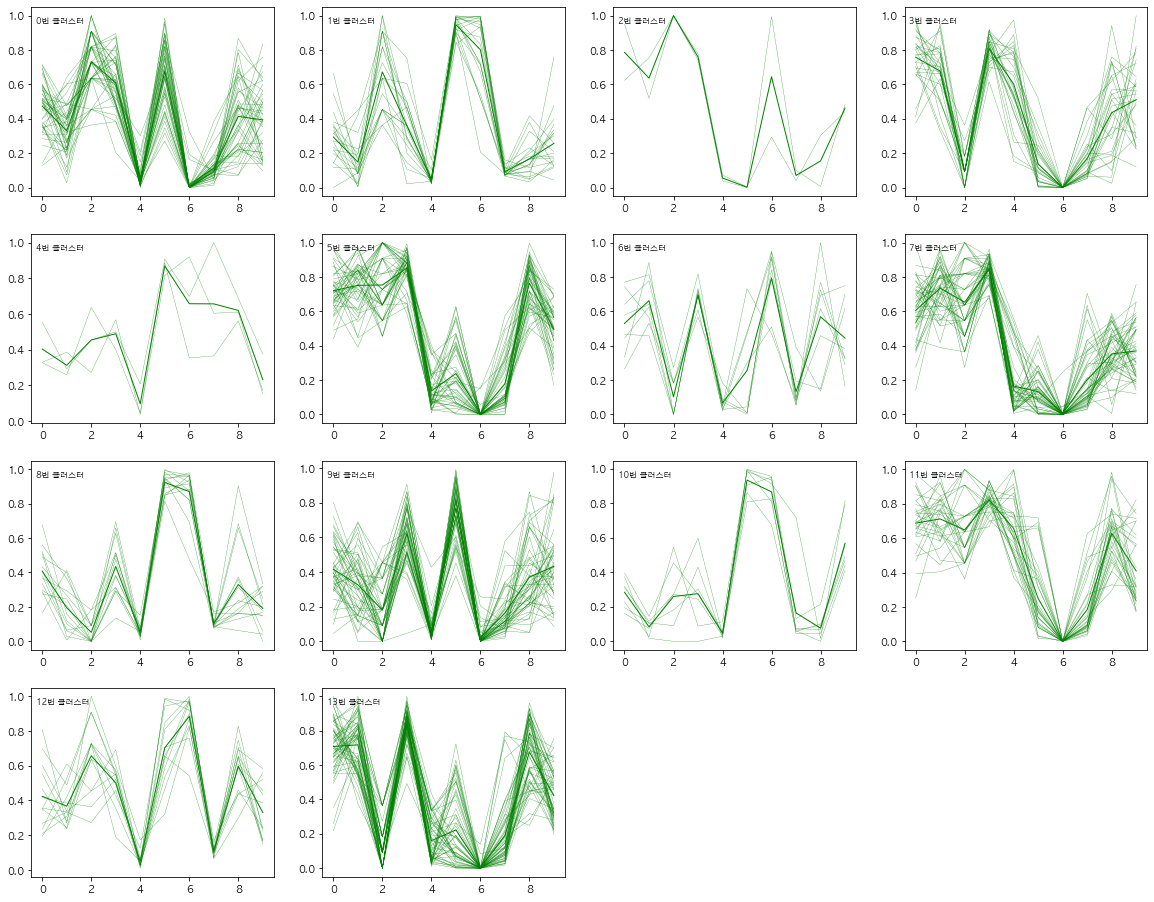

In [135]:
# kmeans = KMeans(datas=norm_features)
# kmeans.fit()
kmeans.cluster_plot()

In [211]:
reco_labels = np.unique(kmeans.labels_[:4])

In [212]:
chk_features = reco_sp.sel_tracks.copy()

chk_features.head()

,trackId,trackName,artistIds,artistName,image,seedId
0,3QKJELWORZZ7rUZDWeMWSA,Água de Beber,5rX2c1zow6hCph8PnnU3kF,Astrud Gilberto,https://i.scdn.co/image/ab67616d0000b273b48a07...,3w9HSuLDejveVS9G8Qj8i0
1,2oMaXY0yiWhAEWD7SutXh2,Joy Spring,"1HJHwWck1EY096ea2iPAHO,6jrlNnS5B830kpi40j3S6g","Clifford Brown,Max Roach",https://i.scdn.co/image/ab67616d0000b273b293b5...,3w9HSuLDejveVS9G8Qj8i0
2,4lj4cW45UP5tQ8AhRxnQi9,Before It's Time to Say Goodbye,0Vz0vgVrclNJlHBLrgjklY,Kenny Garrett,https://i.scdn.co/image/ab67616d0000b2734672a8...,3w9HSuLDejveVS9G8Qj8i0
3,1F8Xb0s4xo9OpsNYWR8U6o,Harlem Nocturne,3rxIQc9kWT6Ueg4BhnOwRK,Quincy Jones,https://i.scdn.co/image/ab67616d0000b2736e9030...,3w9HSuLDejveVS9G8Qj8i0
4,1scswYxDmooSV19whJfGYI,AIYA,3hvinNZRzTLoREmqFiKr1b,CHANGMO,https://i.scdn.co/image/ab67616d0000b27387bf4a...,3w9HSuLDejveVS9G8Qj8i0


In [253]:
reco_ids = chk_features[np.isin(kmeans.labels_[4:],reco_labels)]['trackId'].values

In [255]:
reco_tracks = reco_sp.sel_tracks[np.isin(reco_sp.sel_tracks['trackId'], reco_ids)].copy()

reco_tracks

,trackId,trackName,artistIds,artistName,image,seedId
1,2oMaXY0yiWhAEWD7SutXh2,Joy Spring,"1HJHwWck1EY096ea2iPAHO,6jrlNnS5B830kpi40j3S6g","Clifford Brown,Max Roach",https://i.scdn.co/image/ab67616d0000b273b293b5...,3w9HSuLDejveVS9G8Qj8i0
2,4lj4cW45UP5tQ8AhRxnQi9,Before It's Time to Say Goodbye,0Vz0vgVrclNJlHBLrgjklY,Kenny Garrett,https://i.scdn.co/image/ab67616d0000b2734672a8...,3w9HSuLDejveVS9G8Qj8i0
3,1F8Xb0s4xo9OpsNYWR8U6o,Harlem Nocturne,3rxIQc9kWT6Ueg4BhnOwRK,Quincy Jones,https://i.scdn.co/image/ab67616d0000b2736e9030...,3w9HSuLDejveVS9G8Qj8i0
11,7jKZSxBKle19NDbMOgWmm5,Malcolm’s Theme,6HQYnRM4OzToCYPpVBInuU,Kamasi Washington,https://i.scdn.co/image/ab67616d0000b273b89cae...,3w9HSuLDejveVS9G8Qj8i0
14,1N8kgdsicbNkQE0QettJvg,Birth,0F3Aew9DSd6fb6192K1K0Y,Keith Jarrett,https://i.scdn.co/image/ab67616d0000b273ba99df...,3w9HSuLDejveVS9G8Qj8i0
...,...,...,...,...,...,...
379,2OqRnfC8QqRdcUfVGtidcr,When Your Lover Has Gone - Instrumental,"4L9xEztn5PKQIO5WnI5W3u,3ZUZYvTkSr7kJQyAXVpqaL","Art Farmer,Donald Byrd",https://i.scdn.co/image/ab67616d0000b273a621b0...,6guxIn9kHpncfdkrXn2CIQ
383,6guvedmKd1uuJV2MnePLM5,Alma,2I5A4xP3QGJEDKGhhXMAVr,Jacky Terrasson,https://i.scdn.co/image/ab67616d0000b27321c248...,6guxIn9kHpncfdkrXn2CIQ
388,1pd6iv2ZyzhdCdwvkLbjMM,C’est Magnifique,2P1puQXmG48EVLBrHbum1J,Melody Gardot,https://i.scdn.co/image/ab67616d0000b273531a9f...,6guxIn9kHpncfdkrXn2CIQ
393,5Jafpcu72SIeaOVk4Gboa2,Requiem,6VoQTYD2vUVvm1H031lp3e,Lennie Tristano,https://i.scdn.co/image/ab67616d0000b273797d6a...,6guxIn9kHpncfdkrXn2CIQ


In [257]:
new_reco_features = reco_sp.features[np.isin(reco_sp.features['trackId'], reco_ids)].copy()
new_reco_features

,trackId,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,2oMaXY0yiWhAEWD7SutXh2,0.654,0.3340,8,-12.662,0.0521,0.702,0.714000,0.1140,0.6970,81.544
2,4lj4cW45UP5tQ8AhRxnQi9,0.364,0.1140,1,-16.552,0.0333,0.857,0.635000,0.0839,0.0575,117.715
3,1F8Xb0s4xo9OpsNYWR8U6o,0.373,0.3060,7,-13.405,0.0369,0.652,0.510000,0.1140,0.6420,82.555
11,7jKZSxBKle19NDbMOgWmm5,0.324,0.7270,5,-7.115,0.0674,0.284,0.000058,0.0741,0.4820,106.881
14,1N8kgdsicbNkQE0QettJvg,0.392,0.1190,5,-18.487,0.0390,0.959,0.682000,0.0972,0.1790,103.886
...,...,...,...,...,...,...,...,...,...,...,...
354,2OqRnfC8QqRdcUfVGtidcr,0.488,0.0871,7,-14.736,0.0406,0.975,0.634000,0.0925,0.1810,106.581
358,6guvedmKd1uuJV2MnePLM5,0.614,0.1630,6,-18.937,0.0340,0.887,0.488000,0.1220,0.2050,86.810
362,1pd6iv2ZyzhdCdwvkLbjMM,0.486,0.2920,2,-14.271,0.0277,0.935,0.653000,0.0953,0.2280,100.049
365,5Jafpcu72SIeaOVk4Gboa2,0.447,0.4390,7,-11.853,0.0908,0.994,0.923000,0.1270,0.2230,83.382


In [256]:
reco_tracks['seedId'].value_counts()

6guxIn9kHpncfdkrXn2CIQ    30
3w9HSuLDejveVS9G8Qj8i0    25
2SMq0lOqCTHayWa9juoI0d    23
5quFr5s5PXYfUX5jV2EBZ1    22
Name: seedId, dtype: int64

In [252]:
chk_features[np.isin(kmeans.labels_[4:],reco_labels)]['seedId'].value_counts()

6guxIn9kHpncfdkrXn2CIQ    30
3w9HSuLDejveVS9G8Qj8i0    25
2SMq0lOqCTHayWa9juoI0d    23
5quFr5s5PXYfUX5jV2EBZ1    22
Name: seedId, dtype: int64

In [259]:
my_features = sp.features.iloc[:, 1:].to_numpy()
reco_features = reco_sp.features.iloc[:,1:].to_numpy()

all_features = np.append(my_features, reco_features, axis=0)

_min = all_features.min(axis=0)
_max = all_features.max(axis=0)
norm_features = (all_features - _min) / (_max - _min)

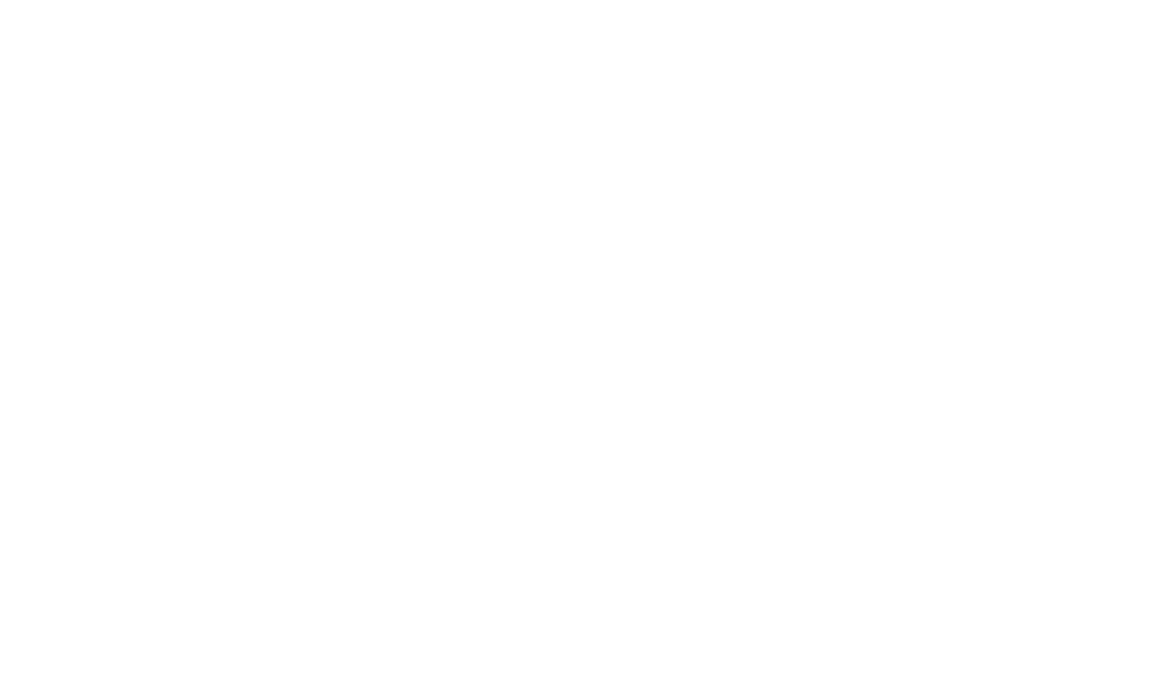

In [274]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],norm_features[:4].T, color='white', linewidth=2.0)
plt.plot(sp.features.columns[1:],norm_features[4:].T, color='white', linewidth=0.1)

plt.savefig("./visual_images/before_filter.png", transparent=True)

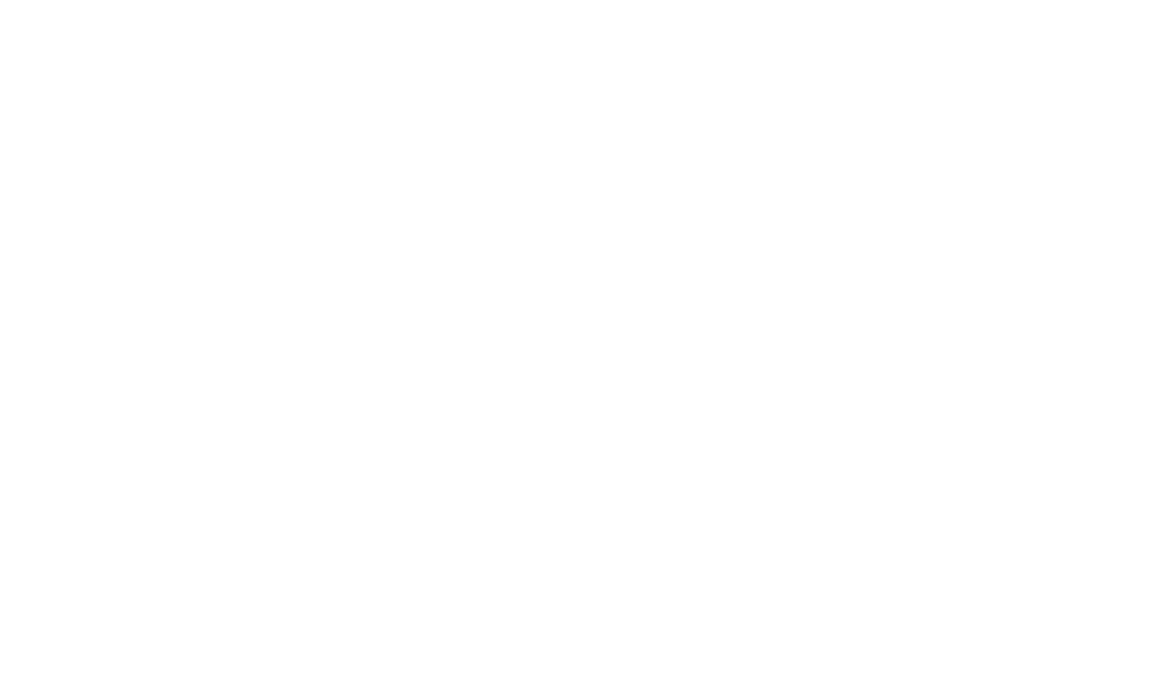

In [273]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:], norm_features[:4].T, color='white', linewidth=2.0)
plt.plot(sp.features.columns[1:], norm_features[4:][np.isin(reco_sp.features['trackId'], reco_ids)].T, color='white', linewidth=0.1)

plt.savefig("./visual_images/after_filter.png", transparent=True)